# Resolution and style of figures for publications 
> "How to adjust the figure resolution when saved as a bitmap (e.g., png) from matplotlib/powerpoint. How to adjust the styles of figures in matplotlib."

- toc: true
- badges: true
- comments: true
- author: Sylvain de Léséleuc
- categories: [matplotlib, figure]

# Change the units from inch to cm

***Matplotlib***

For matplotlib, just define the <code>mm = 1/25.4</code> constant at the beginning of your code, and then set figure sizes as <code>plt.figure(figuresize = (86 * mm, 40 * mm))</code>. 

***Powerpoint***

If seeing inches in your powerpoint software makes you sick, follow this [quick procedure](https://support.microsoft.com/en-us/office/change-the-measurement-units-from-inches-to-centimeters-7fb08d33-750b-4e95-b332-e568d4550d82#:~:text=On%20the%20PowerPoint%20menu%2C%20select,Centimeters%2C%20Points%2C%20or%20Picas.) to change the measurement units from inches to cm. 




# Adjust the resolution of your figure

In the previous Python club, I gave the advice to fix the width of matplotlib figures and powerpoint slides to the 8.6 cm width of an APS journal single column.

When you save such figures or slides in a png format (or any bitmap format), you might end up disappointed by the ugly resolution of the figure... 

<img src="figures/Fig1_100dpi.png" width="400" />

What is happening?

Last week, we only focused on the physical size of the image, but not on the resolution when saved into a bitmap format.  

## What is resolution (dpi)?

The resolution is the number of pixels (for displaying on a screen) or dots (for printing) per inch. 


Warning: there seems to be a lot of confusion about dpi (dots per inch) and ppi (pixel per inch)... Software will often write ppi instead or dpi, or the opposite... But it doesn't matter too much for us...

It is made even worse by the fact that ppi could also indicate *points per inch*. But this one is a conversion **constant** (= 72) between two units (the typography point and the crazy inch)

See also this interesting StackOverflow [answer](https://stackoverflow.com/questions/47633546/relationship-between-dpi-and-figure-size#answer-47639545)


## How to change the resolution?

The default resolution in matplotlib and powerpoint is 100 dpi ~ 4 pixel / mm. 

This is usely good enough when you work with the default figure/slide size, but this is too low if you follow the advice of working with publication-sized figure/slide of ~8 cm. 

In this case, the information content / cm is much higher, and a higher dpi is required. 

### In matplotlib

The number of pixels (= dots for matplotlib) per inch can be configured when saving the figure using:

<code>plt.savefig(dpi = ...)</code>


Below, I show a 50x30 mm figure saved at 100 dpi (left) and 300 dpi (right). 



<img src="figures/Fig1_100dpi.png" width="400" /><img src="figures/Fig1_300dpi.png" width="400" />

100 dots per inch ~ 100/25.4 dots per mm

The first image is thus 50x30 x 100/25.4 = 196x118 pixels, while the second is 590x354 pixels.

***Transparency***

Arvydas pointed out that there is an other useful parameter in the savefig function: **transparency**. 

When using <code>plt.savefig(transparency = True)</code>, the background of the figure will be transparent, instead of white. 

### In powerpoint

You can save a powerpoint slide as a png using *Save as ... PNG*. However, there is no option to change the resolution (dpi) from the powerpoint user interface. 

To change the dpi from the default value of 100, you have to create a new key in the [Windows Registry](https://en.wikipedia.org/wiki/Windows_Registry) that contains "low-level settings for Microsoft and [...] applications".

Follow this [procedure](https://docs.microsoft.com/en-us/office/troubleshoot/powerpoint/change-export-slide-resolution). 

**Note on Tools ... Compress figures**

When you save your ppt, there is a *tools* button on the right of the *save* button. If you click it, and then click on *compress figures*, there is a dialog offering different ppi settings. This **does not** change the resolution of your png file, but simply compress figures included in your slide... 

## Resolution and display on the screen

Above, I intentionnally fixed the figure width to 400 pixels in the markdown code <code>src="figures/Fig1_100dpi.png" width="400"</code>. Because the 400 pixels do not correspond to the number of pixels in the bitmap, some interpolation is required. This interpolation gives rise to the blurry feature of the left image, where new pixels had to be created from the original image file. 

Below, I remove the <code>width</code> statement. The markdown cell will render the figure with a size fixed by the number of pixels. So the picture on the right is 3x bigger, as it contains 3x more pixels per inch. 

<img src="figures/Fig1_100dpi.png"/> <img src="figures/Fig1_300dpi.png"/>

***Some more fun 2***

You have a similar effect in jupyter notebook. 

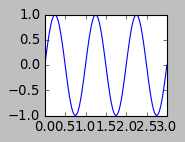

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')

mm = 1/25.4

plt.figure(figsize = (50 * mm, 40 * mm))

x = np.linspace(0,3,100)
plt.plot(x,np.sin(2*np.pi*x))

plt.show()

In [39]:
50*mm * 100

196.8503937007874

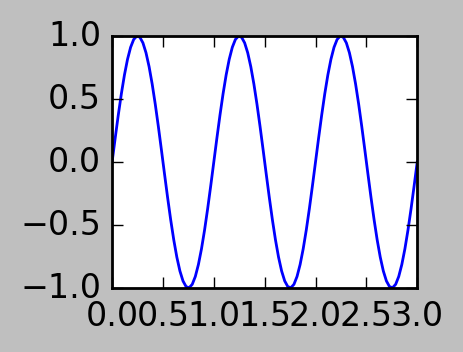

In [30]:
plt.figure(figsize = (50 * mm, 40 * mm), dpi = 200)

x = np.linspace(0,3,100)
plt.plot(x,np.sin(2*np.pi*x))

plt.show()

# Install a ruler app

## ScreenRuler 

Ever got caught by a colleague while holding a ruler in front of your screen? Use this nice open-source [ruler](https://github.com/Bluegrams/ScreenRuler) for Windows! 

## Calibration

The ruler natural units of measurement is ... the pixel.

However a pixel is not a universal unit as it depends ... on your screen, and you might prefer to know the length of elements on your screen in cm (or points, or inch)... 

You can easily change the measurement unit of the Ruler app, but some calibration of the pixel size is required beforehand. 

**Screen dpi**

Click on *calibrate ruler* and enter your screen **dpi** to convert from pixel to cm/inch/point. 

The **dpi** is the number of pixels per inch of your screen. 

You can calculate out the dpi by diving the number of horizontal pixel (1920 for my 1920x1080 screen) by the screen width (600 mm for me, this is the last time that you will need a ruler). So in my case, the dpi is $1920 / 600 \times 25.4 \sim 81.2$. 

A better result is obtained by calculating the dpi from both horizontal and vertical directions: ${\rm dpi} = \sqrt{\frac{1920 \times 1080}{600 \times 335}}\times 25.4 = 81.58$. 

In [72]:
(1080*1920/335/600)**0.5*25.4

81.58271985601165

# Adjust matplotlib style

## plt.style

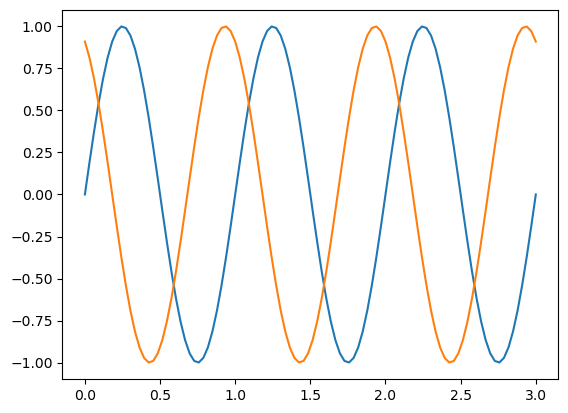

In [79]:
plt.style.use('default')

plt.figure()

x = np.linspace(0,3,100)
plt.plot(x,np.sin(2*np.pi*x))
plt.plot(x,np.sin(2*np.pi*x+2))

plt.show()

## plt.rc

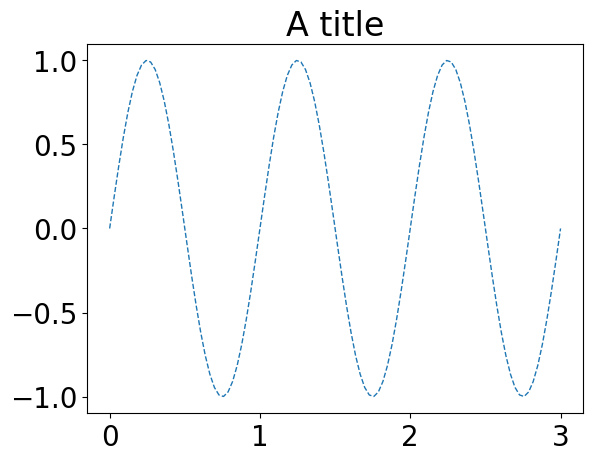

In [88]:
plt.style.use('default')

# plt.rcParams.update({'font.size':10})
plt.rc('font', size = 20)


plt.figure()

x = np.linspace(0,3,100)
plt.plot(x,np.sin(2*np.pi*x), ls = '--', lw = 1)
plt.title('A title')
plt.show()